In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from itertools import chain
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
file_path = "/content/drive/MyDrive/Colab Notebooks/data/parkinson_ai.csv"

try:
    data = pd.read_csv(file_path, sep="|")
except Exception as e:
    print("Error al cargar el archivo:", e)

In [20]:
#Definir un diccionario llamado updrs que contiene tres claves: “UPDRS1”, “UPDRS2” y “UPDRS3”.
updrs = {"UPDRS1": ["Estado mental (p. ej., claridad, atención y memoria).",
                    'Alucinaciones y psicosis.',
                    'Estado de ánimo depresivo.', 'Estado de ánimo ansioso.', "Apatia",
                    "Control de emocional", "Problema de sueño", "Somnolencia diurna"],
          "UPDRS2": ["Problemas para hablar", "Exceso de saliva", "Dificultades para tragar y comer", "Manejo de alimentos y cubiertos complicado",
                      "Problemas para vestirse", "Ayuda necesaria en higiene personal", "Dificultad en la escritura", "Problemas para realizar hobbies",
                      "Dificultades para moverse en la cama", "Presencia de temblor", "Dificultades para levantarse", "Problemas con marcha y equilibrio", "Congelación al caminar"],
          "UPDRS3": ["Lenguaje", "Expresión facial", "Rigidez - Cuello", "Rigidez - MSD", "Rigidez - MSI", "Rigidez - MID", "Rigidez - MII", "Golpeteo de dedos (tapping) - Mano derecha",
                     "Golpeteo de dedos (tapping) - Mano izquierda", "Movimientos de las manos - Mano derecha", "Movimientos de las manos - Mano izquierda", "Pronación-supinación - Mano derecha",
                     "Pronación-supinación - Mano izquierda", "Golpeteo con los dedos de los pies - Pie derecho", "Golpeteo con los dedos de los pies - Pie izquierdo",
                     "Agilidad con las piernas - Pierna derecha", "Agilidad con las piernas - Pierna izquierda", "Levantarse de la silla", "Marcha", "Congelación de la marcha", "Estabilidad postural",
                     "Postura", "Espontaneidad global de movimientos", "Temblor postural - Mano derecha", "Temblor postural - Mano izquierda",
                     "Temblor de acción - Mano derecha", "Temblor de acción - Mano izquierda", "Amplitud del temblor de reposo - MSD", "Amplitud del temblor de reposo - MSI",
                     "Amplitud del temblor de reposo - MID", "Amplitud del temblor de reposo - MII", "Amplitud del temblor de reposo - Labio/mandíbula", "Persistencia del temblor de reposo"]
                }


#d = {'Estado de ánimo y comportamiento (p. ej., depresión, motivación).': 'Alucinaciones y psicosis.',
# 'Actividad del día a día y comportamiento.': 'Estado de ánimo depresivo.',
# 'Motivación/Iniciativa.': 'Estado de ánimo ansioso.'}

#data.rename(columns = d, inplace = True)

# Filtrar el diccionario updrs para mantener solo aquellos elementos cuyos valores están presentes en las columnas del DataFrame data
updrs = {k: [filter_v for filter_v in v if filter_v in data.columns] for k,v in updrs.items()}

# Aplanar las listas de valores en el diccionario updrs en una sola lista
all_updrs = list(chain.from_iterable(updrs.values()))

# Eliminar cualquier fila en el DataFrame data que tenga algún valor nulo (NaN) en las columnas especificadas en all_updrs
data.dropna(subset = all_updrs, how="any", inplace=True)

# Devolver la forma del DataFrame data después de eliminar las filas con valores nulos
data.shape

(220, 78)

In [18]:
# Selección de columnas relevantes
neuropsychiatric_columns = [
    'Estado mental (p. ej., claridad, atención y memoria).',
    'Estado de ánimo y comportamiento (p. ej., depresión, motivación).',
    'Motivación/Iniciativa.',
    'Apatia',
    'Control de emocional',
    'Problema de sueño',
    'Somnolencia diurna'
]

motor_columns = [
    'Presencia de temblor',
    'Dificultades para levantarse',
    'Problemas con marcha y equilibrio',
    'Congelación al caminar',
    'Lenguaje',
    'Expresión facial',
    'Rigidez - Cuello',
    'Rigidez - MSD',
    'Rigidez - MSI',
    'Rigidez - MID',
    'Rigidez - MII',
    'Golpeteo de dedos (tapping) - Mano derecha',
    'Golpeteo de dedos (tapping) - Mano izquierda',
    'Movimientos de las manos - Mano derecha',
    'Movimientos de las manos - Mano izquierda',
    'Pronación-supinación - Mano derecha',
    'Pronación-supinación - Mano izquierda',
    'Golpeteo con los dedos de los pies - Pie derecho',
    'Golpeteo con los dedos de los pies - Pie izquierdo',
    'Agilidad con las piernas - Pierna derecha',
    'Agilidad con las piernas - Pierna izquierda',
    'Levantarse de la silla',
    'Marcha',
    'Congelación de la marcha',
    'Estabilidad postural',
    'Postura',
    'Espontaneidad global de movimientos',
    'Temblor postural - Mano derecha',
    'Temblor postural - Mano izquierda',
    'Temblor de acción - Mano derecha',
    'Temblor de acción - Mano izquierda',
    'Amplitud del temblor de reposo - MSD',
    'Amplitud del temblor de reposo - MSI',
    'Amplitud del temblor de reposo - MID',
    'Amplitud del temblor de reposo - MII',
    'Amplitud del temblor de reposo - Labio/mandíbula',
    'Persistencia del temblor de reposo'
]

# Extraer datos relevantes
neuropsychiatric_data = data[neuropsychiatric_columns]
motor_data = data[motor_columns]

#Caracteristicas adicionales.

Con el afán de poder obtener mejores rendimientos con las técnicas de clusterización adicionamos variables que recojan en manera más amplia la información de las variables involucradas.

Construimos 'Total_Symptoms' como la suma de varias caracteristicas con la intención de contar el número de síntomas presentes. Cada columna representa la presencia (1) o ausencia (0) de un síntoma, por lo que la suma proporcionará el número total de síntomas que un individuo presenta. Este tipo de agregación es útil para tener una medida simple y rápida del estado general del paciente en términos de número de síntomas.

Tambien construimos 'Mental Mood Interaction' que es la interacción entre problemas de estado mental y problemas de ánimo y que podría ser relevante para identificar subgrupos de pacientes con una combinación particular de síntomas que afectan su tratamiento o pronóstico.

In [21]:
# Crear características agregadas
neuropsychiatric_data['Total_Symptoms'] = neuropsychiatric_data[
    [
        'Estado mental (p. ej., claridad, atención y memoria).',
        'Estado de ánimo y comportamiento (p. ej., depresión, motivación).',
        'Motivación/Iniciativa.',
        'Apatia',
        'Control de emocional',
        'Problema de sueño',
        'Somnolencia diurna'
    ]
].sum(axis=1)

# Crear características de interacción
neuropsychiatric_data['Mental_Mood_Interaction'] = neuropsychiatric_data[
    'Estado mental (p. ej., claridad, atención y memoria).'
] * neuropsychiatric_data[
    'Estado de ánimo y comportamiento (p. ej., depresión, motivación).'
]

# Normalizar los datos
scaler = StandardScaler()
neuropsychiatric_data_scaled = scaler.fit_transform(neuropsychiatric_data)

# Seleccionar características nuevas y originales para la clusterización
features_for_clustering = neuropsychiatric_data[
    [
        'Total_Symptoms',
        'Mental_Mood_Interaction'
    ]
]

# Normalizar las nuevas características
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)


##Clusterización Utilizando K-means


In [22]:
# Aplicar K-means con 3 clusters a las nuevas características
kmeans_new = KMeans(n_clusters=3, random_state=0)
clusters_new = kmeans_new.fit_predict(features_for_clustering_scaled)

# Calcular el índice de silueta para los nuevos clusters
silhouette_avg_new = silhouette_score(features_for_clustering_scaled, clusters_new)

# Añadir los nuevos clusters a los datos originales
neuropsychiatric_data['Cluster_New'] = clusters_new

# Agrupar por clusters y calcular las medias para ver las características de cada cluster
cluster_summary_new = neuropsychiatric_data.groupby('Cluster_New').mean()

# Redondear el puntaje de Silhouette a 4 dígitos
silhouette_avg_rounded = round(silhouette_avg_new, 4)

# Imprimir el puntaje de Silhouette
print(f'Silhouette Score es: {silhouette_avg_rounded}')

cluster_summary_new

Silhouette Score es: 0.652


,"Estado mental (p. ej., claridad, atención y memoria).","Estado de ánimo y comportamiento (p. ej., depresión, motivación).",Motivación/Iniciativa.,Apatia,Control de emocional,Problema de sueño,Somnolencia diurna,Total_Symptoms,Mental_Mood_Interaction
Cluster_New,,,,,,,,,
0,0.163043,0.021739,0.271739,0.119565,0.043478,0.315217,0.326087,1.260870,0.0
1,1.000000,1.000000,0.852941,0.705882,0.529412,0.794118,0.823529,5.705882,1.0
2,0.457447,0.063830,0.819149,0.638298,0.234043,0.723404,0.776596,3.712766,0.0


Dado que usamos variables agregadas preferimos utilizar los componentes principales para visualizar la diferencia en los grupos a través de sus componentes principales. Usar PCA para graficar los clusters tiene las siguientes ventajas:

- Permite reducir la dimensionalidad para facilitar la visualización.
- Captura la mayor parte de la variabilidad importante de los datos.
- Mejora la separación visual de clusters.
- Reduce el ruido y la redundancia, destacando las estructuras significativas.

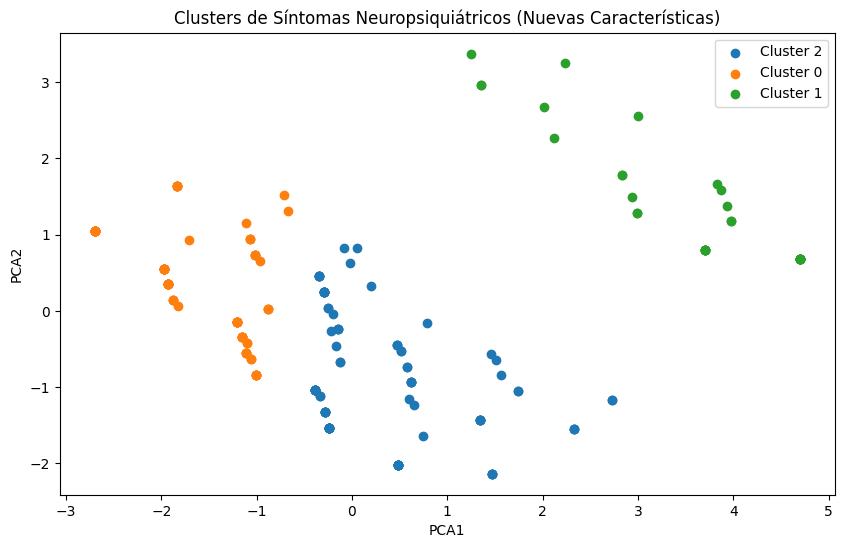

In [23]:
# Aplicar PCA para crear componentes principales
pca = PCA(n_components=2)
pca_features = pca.fit_transform(neuropsychiatric_data_scaled)
neuropsychiatric_data['PCA1'] = pca_features[:, 0]
neuropsychiatric_data['PCA2'] = pca_features[:, 1]

# Graficar los clusters usando las nuevas características PCA
plt.figure(figsize=(10, 6))
for cluster in neuropsychiatric_data['Cluster_New'].unique():
    subset = neuropsychiatric_data[neuropsychiatric_data['Cluster_New'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters de Síntomas Neuropsiquiátricos (Nuevas Características)')
plt.legend()
plt.show()

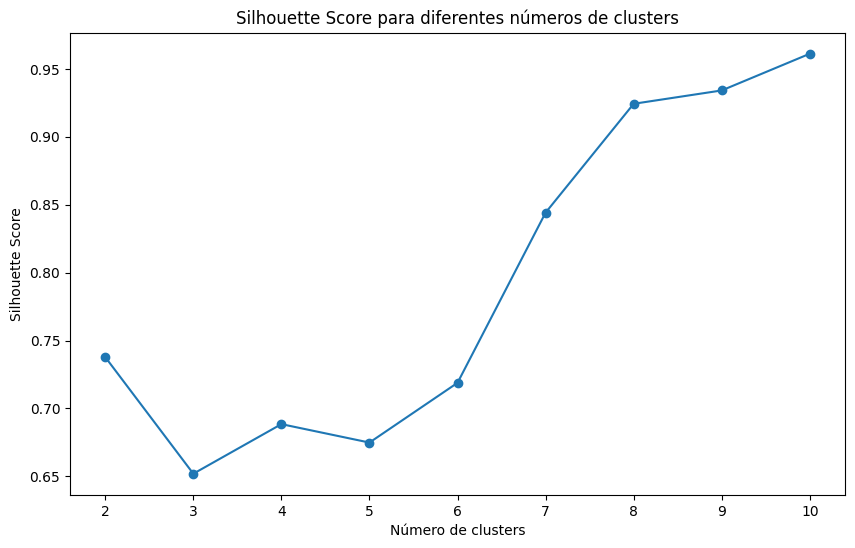

10

In [24]:
# Probar diferentes números de clusters para encontrar el número óptimo basado en el Silhouette Score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(features_for_clustering_scaled)
    score = silhouette_score(features_for_clustering_scaled, clusters)
    silhouette_scores.append(score)

# Graficar el Silhouette Score para diferentes números de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Encontrar el número óptimo de clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k

A pesar que este método indica que el valor más alto del score se alcanza con 10 clusters,dados los datos que estamos dando como entrada (enteros) basicamente es un cluster por cada combinación de valores distintos , por tanto analicemos que podemos inferir con 2 clusters

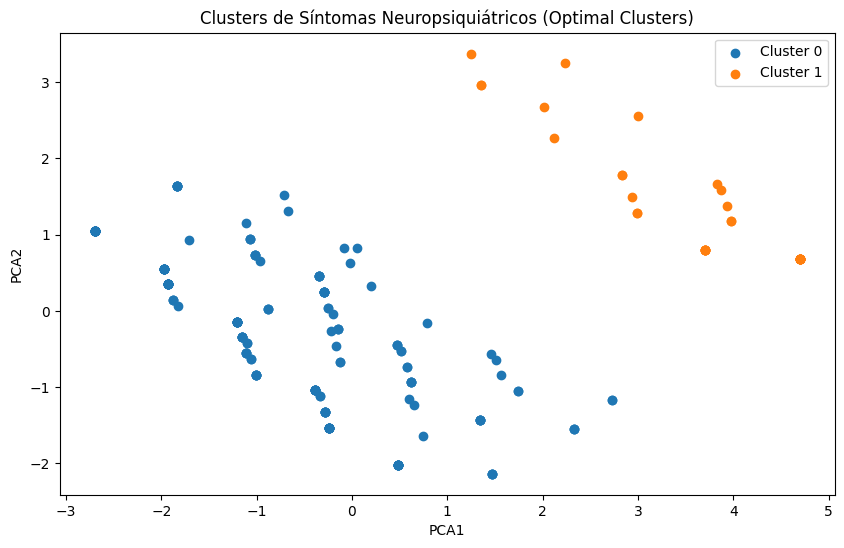

,"Estado mental (p. ej., claridad, atención y memoria).","Estado de ánimo y comportamiento (p. ej., depresión, motivación).",Motivación/Iniciativa.,Apatia,Control de emocional,Problema de sueño,Somnolencia diurna,Total_Symptoms,Mental_Mood_Interaction,Cluster_New,PCA1,PCA2
Cluster_Optimal,,,,,,,,,,,,
0,0.311828,0.043011,0.548387,0.381720,0.139785,0.521505,0.553763,2.500000,0.0,1.010753,-0.652577,-0.252784
1,1.000000,1.000000,0.852941,0.705882,0.529412,0.794118,0.823529,5.705882,1.0,1.000000,3.569981,1.382875


In [26]:
# Aplicar K-means con 2 clusters a las nuevas características
kmeans_optimal = KMeans(n_clusters=2, random_state=0)
clusters_optimal = kmeans_optimal.fit_predict(features_for_clustering_scaled)

# Calcular el índice de silueta para los clusters óptimos
silhouette_avg_optimal = silhouette_score(features_for_clustering_scaled, clusters_optimal)

# Añadir los clusters óptimos a los datos originales
neuropsychiatric_data['Cluster_Optimal'] = clusters_optimal

# Agrupar por clusters y calcular las medias para ver las características de cada cluster
cluster_summary_optimal = neuropsychiatric_data.groupby('Cluster_Optimal').mean()

# Graficar los clusters óptimos usando PCA
plt.figure(figsize=(10, 6))
for cluster in neuropsychiatric_data['Cluster_Optimal'].unique():
    subset = neuropsychiatric_data[neuropsychiatric_data['Cluster_Optimal'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters de Síntomas Neuropsiquiátricos (Optimal Clusters)')
plt.legend()
plt.show()

silhouette_avg_optimal
cluster_summary_optimal


<Axes: ylabel='Cluster'>

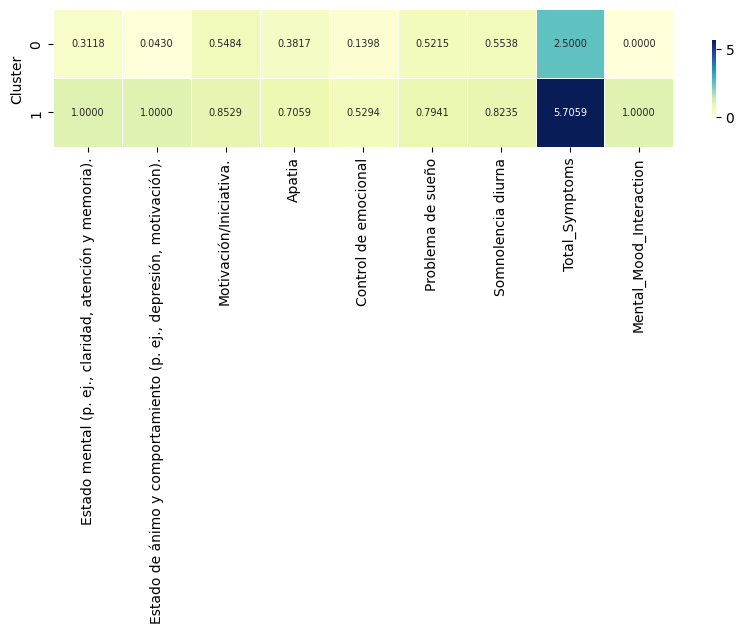

In [28]:
# Relacionar clusters con síntomas motores (agregar clusters a los datos de síntomas motores)
motor_data['Cluster'] = clusters_optimal
neuropsychiatric_data['Cluster'] = clusters_optimal

cluster_means_neuro = neuropsychiatric_data.groupby('Cluster').mean()
cluster_means_neuro=cluster_means_neuro.drop(['Cluster_Optimal', 'Cluster_New','PCA1','PCA2'], axis=1)

fig, ax= plt.subplots(figsize=(10, 10))
ax.set_aspect('equal','box')
sns.heatmap(cluster_means_neuro, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

<Axes: ylabel='Cluster'>

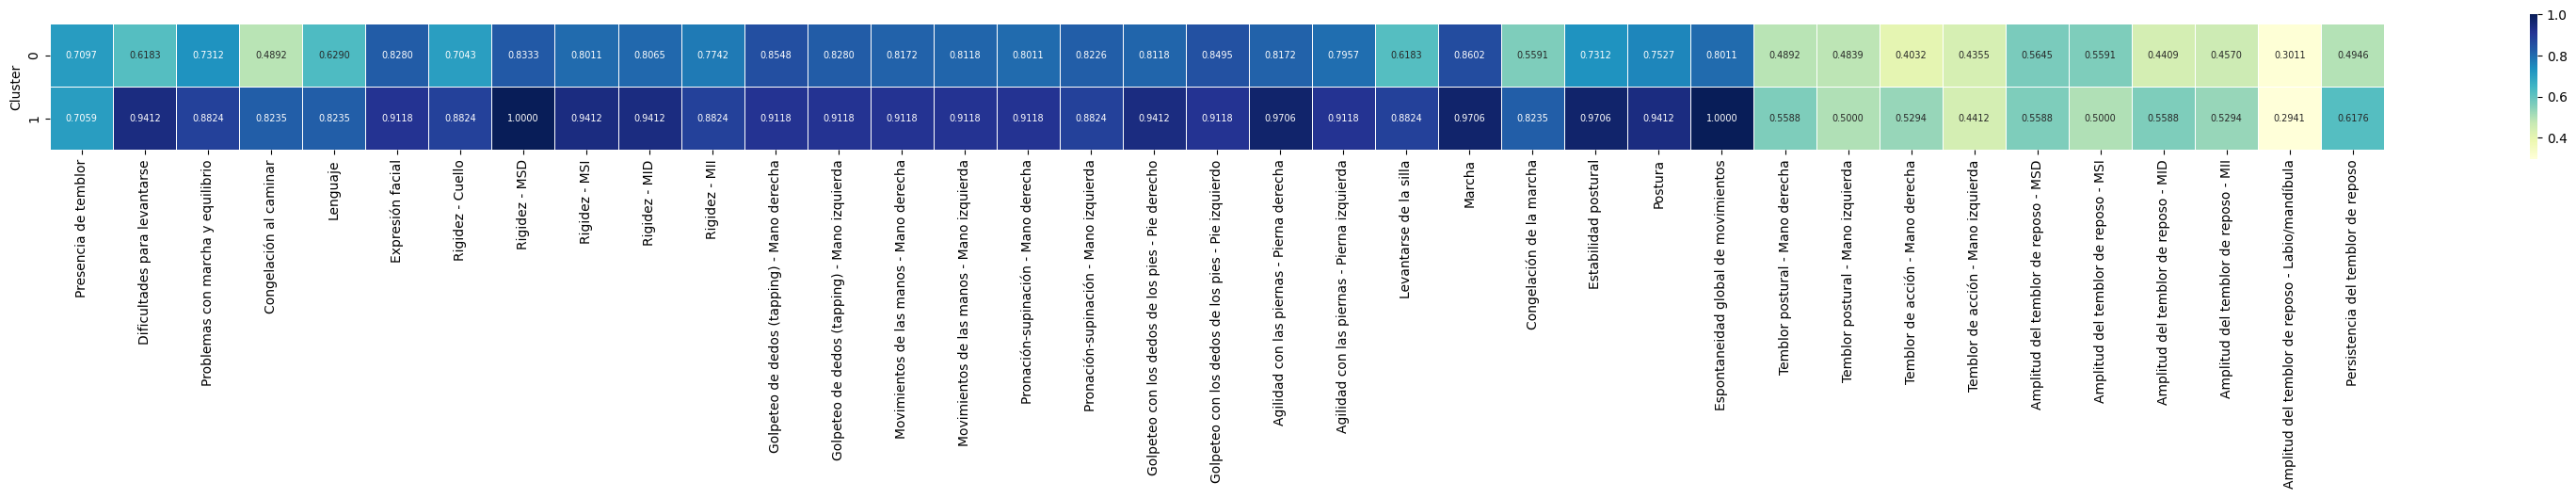

In [29]:
# Relacionar clusters con síntomas motores (agregar clusters a los datos de síntomas motores)
motor_data['Cluster'] = clusters_optimal
neuropsychiatric_data['Cluster'] = clusters_optimal

cluster_means_motor = motor_data.groupby('Cluster').mean()
#cluster_means_motor=cluster_means_neuro.drop(['Cluster_Optimal', 'Cluster_New'], axis=1)

fig, ax= plt.subplots(figsize=(40, 20))
ax.set_aspect('equal','box')
sns.heatmap(cluster_means_motor, annot=True, fmt='.4f', cmap='YlGnBu', annot_kws={"size": 7}, linewidth=.5, cbar_kws={'shrink': 0.1})

###Descripción de los Clusters

**Cluster 0:**

**Descripción General:** El Cluster 0 se caracteriza por una menor prevalencia de síntomas tanto motores como neuropsiquiátricos en comparación con el Cluster 1. Los individuos en este grupo presentan síntomas moderados de Parkinson.

En términos de síntomas motores, el 61.83% de los individuos en el Cluster 0 tienen dificultades para levantarse, que es significativamente menor que el 94.12% observado en el Cluster 1. La congelación al caminar es menos prevalente en este grupo, afectando solo al 48.92% de los individuos, en contraste con el 82.35% del Cluster 1. Los problemas de lenguaje son menos comunes en el Cluster 0, con un 62.90% de individuos afectados, comparado con el 82.35% en el Cluster 1.

El Cluster 0 también muestra una menor prevalencia de rigidez, especialmente en el cuello (70.43% versus 88.24% en el Cluster 1) y en los miembros superiores derechos (83.33% versus 100% en el Cluster 1). La rigidez en los miembros inferiores derechos también es menos común en este grupo (80.65% en el Cluster 0 frente a 94.12% en el Cluster 1).

En cuanto a los síntomas neuropsiquiátricos, el Cluster 0 presenta una prevalencia significativamente menor de problemas de estado mental, con solo el 31.18% de los individuos afectados, en comparación con el 100% del Cluster 1. Los problemas de ánimo y comportamiento también son mucho menos comunes en el Cluster 0, afectando solo al 4.30% de los individuos, mientras que en el Cluster 1 este problema es universal (100%). Además, el control emocional es significativamente mejor en el Cluster 0, con solo el 13.98% de los individuos afectados, comparado con el 52.94% en el Cluster 1.

Los problemas de sueño y la somnolencia diurna son menos prevalentes en el Cluster 0, afectando al 52.15% y al 55.38% de los individuos, respectivamente, en comparación con el 79.41% y el 82.35% en el Cluster 1. En promedio, los individuos del Cluster 0 presentan menos síntomas neuropsiquiátricos, con un total de 2.5 síntomas, frente a los 5.71 síntomas del Cluster 1.

**Cluster 1:**

**Descripción General:**

El Cluster 1 se caracteriza por una alta prevalencia de síntomas motores y neuropsiquiátricos, indicando una mayor severidad del Parkinson en comparación con el Cluster 0.

En términos de síntomas motores, una característica destacada del Cluster 1 es que el 94.12% de los individuos tienen dificultades para levantarse, lo que es significativamente mayor que el 61.83% en el Cluster 0. La congelación al caminar afecta al 82.35% de los individuos en el Cluster 1, en comparación con el 48.92% en el Cluster 0. Los problemas de lenguaje son también más prevalentes en este grupo, afectando al 82.35% de los individuos, frente al 62.90% en el Cluster 0.

La rigidez es notablemente más prevalente en el Cluster 1. Todos los individuos (100%) en este grupo presentan rigidez en los miembros superiores derechos, en comparación con el 83.33% en el Cluster 0. La rigidez en el cuello y en los miembros inferiores derechos es también significativamente mayor en el Cluster 1 (88.24% y 94.12% respectivamente) en comparación con el Cluster 0 (70.43% y 80.65%).

En cuanto a los síntomas neuropsiquiátricos, todos los individuos en el Cluster 1 (100%) presentan problemas de estado mental, en contraste con solo el 31.18% en el Cluster 0. Los problemas de ánimo y comportamiento también son universales en el Cluster 1 (100%), mientras que solo afectan al 4.30% en el Cluster 0. Además, el control emocional es un problema significativo en el Cluster 1, afectando al 52.94% de los individuos, en comparación con el 13.98% en el Cluster 0.

Los problemas de sueño y la somnolencia diurna son más prevalentes en el Cluster 1, afectando al 79.41% y al 82.35% de los individuos respectivamente, en comparación con el 52.15% y el 55.38% en el Cluster 0. En promedio, los individuos del Cluster 1 presentan una alta carga de síntomas neuropsiquiátricos, con un total de 5.71 síntomas, significativamente mayor que los 2.5 síntomas observados en el Cluster 0.

###¿Cómo saber si hay efectos particulares entre sintomas y si son más marcados en un cluster que otro?

Para ello usaremos la regresión logistica.La regresión es utilizada para modelar la relación entre una variable dependiente binaria (dicotómica) y una o más variables independientes. Es especialmente útil cuando la variable dependiente puede tomar solo dos valores, como "sí" o "no", "presencia" o "ausencia". Aquí se explican las razones para usar regresión logística para analizar la relación entre síntomas neuropsiquiátricos y síntomas motores:


1. **Modelo de Probabilidad:**
La regresión logística permite modelar la probabilidad de que ocurra un evento, dado un conjunto de variables independientes. En este contexto, el evento es la presencia de un síntoma motor, y las variables independientes son los síntomas neuropsiquiátricos.  

*   Ejemplo:
Queremos saber la probabilidad de que un paciente presente temblor (sí/no) en función de su estado de ánimo (por ejemplo, depresión, motivación). La regresión logística nos ayuda a estimar esta probabilidad.

2. **Relación No Lineal:**
La relación entre la variable dependiente y las variables independientes en la regresión logística es no lineal. Esto es apropiado cuando los cambios en las variables independientes no producen cambios lineales en la variable dependiente.
*  Ejemplo:
Un aumento en la depresión no necesariamente causa un aumento lineal en la probabilidad de tener temblor. En cambio, la relación puede ser más compleja y no lineal.

3. **Interpretación de Coeficientes:**
Los coeficientes en la regresión logística pueden interpretarse en términos de odds ratios. Un coeficiente positivo indica que un aumento en la variable independiente aumenta las probabilidades del evento (por ejemplo, la presencia de un síntoma motor), mientras que un coeficiente negativo indica lo contrario.

*  Ejemplo:
Si el coeficiente para el estado de ánimo (depresión) es positivo, significa que a medida que la depresión aumenta, también aumentan las probabilidades de que el paciente presente temblor.

4. **Análisis de Variables Categóricas y Continuas:**
La regresión logística puede manejar tanto variables independientes categóricas como continuas, permitiendo una mayor flexibilidad en el análisis de datos clínicos, donde las variables pueden ser de diferentes tipos.

*  Ejemplo:
Podemos incluir tanto variables continuas como la severidad de la depresión (medida en una escala) como variables categóricas como el género del paciente (hombre/mujer) en el mismo modelo.

5. Control de Factores Confusos
Al incluir múltiples variables independientes en el modelo, la regresión logística permite controlar el efecto de factores confusos que podrían influir en la relación entre los síntomas neuropsiquiátricos y los síntomas motores.

*  Ejemplo:
Podemos controlar el efecto de la edad y el género al investigar la relación entre la depresión y el temblor, asegurando que los resultados sean más robustos y menos sesgados.

6. Significancia Estadística
La regresión logística proporciona pruebas de significancia estadística (p-valores) para los coeficientes, ayudando a determinar si las relaciones observadas son estadísticamente significativas.

* Ejemplo:
Un p-valor bajo para el coeficiente de depresión indica que hay suficiente evidencia para afirmar que la depresión está significativamente asociada con la presencia de temblor.

7. Evaluación del Modelo
La bondad de ajuste del modelo de regresión logística puede evaluarse mediante varias métricas, como la pseudo-R² y la curva ROC, proporcionando una evaluación completa de la capacidad predictiva del modelo.

* Ejemplo:
Podemos usar la curva ROC para evaluar la precisión del modelo en predecir la presencia de temblor basado en los síntomas neuropsiquiátricos.

In [46]:
# Crear un DataFrame para almacenar los resultados
regression_results = pd.DataFrame(columns=['Neuro Symptom', 'Motor Symptom', 'Cluster', 'Coefficient', 'P-Value'])

neuro_symptoms=neuropsychiatric_columns
motor_symptoms=motor_columns

combined_data = neuropsychiatric_data.join(motor_data, how='inner', lsuffix='_neuro', rsuffix='_motor')

# Crear un DataFrame para almacenar los resultados
regression_results = pd.DataFrame(columns=['Neuro Symptom', 'Motor Symptom', 'Cluster', 'Coefficient', 'P-Value'])

# Función para verificar datos antes de la regresión
def verify_data(X, y):
    # Verificar que no haya valores faltantes
    if X.isnull().any().any() or y.isnull().any():
        return False
    # Verificar que haya variabilidad en y
    if y.nunique() <= 1:
        return False
    return True

# Ejecutar la regresión logística para cada combinación de neuro_symptoms y motor_symptoms
for neuro in neuro_symptoms:
    for motor in motor_symptoms:
        for cluster in combined_data['Cluster_Optimal'].unique():
            # Filtrar los datos para el cluster actual
            data_cluster = combined_data[combined_data['Cluster_Optimal'] == cluster]

            # Variables independientes y dependientes
            X = data_cluster[[neuro]]
            y = data_cluster[motor]

            # Verificar datos antes de la regresión
            if not verify_data(X, y):
                print(f"Datos insuficientes o inválidos para {neuro} y {motor} en cluster {cluster}")
                continue

            # Añadir constante
            X = sm.add_constant(X)

            try:
                # Ajustar el modelo de regresión logística
                logit_model = sm.Logit(y, X).fit(disp=0)
                results_summary = logit_model.summary2().tables[1]

                # Extraer los resultados relevantes
                coef = results_summary.loc[neuro, 'Coef.']
                p_value = results_summary.loc[neuro, 'P>|z|']

                # Crear un nuevo DataFrame con los resultados
                new_row = pd.DataFrame({
                    'Neuro Symptom': [neuro],
                    'Motor Symptom': [motor],
                    'Cluster': [cluster],
                    'Coefficient': [coef],
                    'P-Value': [p_value]
                })

                # Añadir los resultados al DataFrame
                regression_results = pd.concat([regression_results, new_row], ignore_index=True)
            except Exception as e:
                print(f"Error en la regresión para {neuro} y {motor} en cluster {cluster}: {e}")

# Mostrar los resultados de la regresión
regression_results.head()

Datos insuficientes o inválidos para Estado mental (p. ej., claridad, atención y memoria). y Rigidez - MSD en cluster 1
Datos insuficientes o inválidos para Estado mental (p. ej., claridad, atención y memoria). y Espontaneidad global de movimientos en cluster 1
Datos insuficientes o inválidos para Estado de ánimo y comportamiento (p. ej., depresión, motivación). y Rigidez - MSD en cluster 1
Datos insuficientes o inválidos para Estado de ánimo y comportamiento (p. ej., depresión, motivación). y Espontaneidad global de movimientos en cluster 1
Error en la regresión para Motivación/Iniciativa. y Congelación al caminar en cluster 1: Singular matrix
Datos insuficientes o inválidos para Motivación/Iniciativa. y Rigidez - MSD en cluster 1
Error en la regresión para Motivación/Iniciativa. y Congelación de la marcha en cluster 1: Singular matrix
Datos insuficientes o inválidos para Motivación/Iniciativa. y Espontaneidad global de movimientos en cluster 1
Error en la regresión para Motivación/In

,Neuro Symptom,Motor Symptom,Cluster,Coefficient,P-Value
0,"Estado mental (p. ej., claridad, atención y me...",Presencia de temblor,0,0.228075,0.521847
1,"Estado mental (p. ej., claridad, atención y me...",Presencia de temblor,1,0.875469,0.020019
2,"Estado mental (p. ej., claridad, atención y me...",Dificultades para levantarse,0,0.229874,0.486082
3,"Estado mental (p. ej., claridad, atención y me...",Dificultades para levantarse,1,2.772589,0.000142
4,"Estado mental (p. ej., claridad, atención y me...",Problemas con marcha y equilibrio,0,0.341772,0.356098


In [48]:
# Filtrar las relaciones significativas con p-valor < 0.05
significant_results = regression_results[regression_results['P-Value'] < 0.05]

# Ordenar por el valor absoluto del coeficiente para encontrar las relaciones más fuertes
strongest_significant_results = significant_results.reindex(significant_results['Coefficient'].abs().sort_values(ascending=False).index)

# Seleccionar las 6 relaciones más fuertes y significativas
top_6_strongest_significant_results = strongest_significant_results.head(10)

# Mostrar los resultados
top_6_strongest_significant_results


,Neuro Symptom,Motor Symptom,Cluster,Coefficient,P-Value
120,"Estado de ánimo y comportamiento (p. ej., depr...",Estabilidad postural,1,3.496508,0.000572
116,"Estado de ánimo y comportamiento (p. ej., depr...",Marcha,1,3.496508,0.000572
110,"Estado de ánimo y comportamiento (p. ej., depr...",Agilidad con las piernas - Pierna derecha,1,3.496508,0.000572
48,"Estado mental (p. ej., claridad, atención y me...",Estabilidad postural,1,3.496508,0.000572
44,"Estado mental (p. ej., claridad, atención y me...",Marcha,1,3.496508,0.000572
38,"Estado mental (p. ej., claridad, atención y me...",Agilidad con las piernas - Pierna derecha,1,3.496508,0.000572
248,Apatia,Congelación de la marcha,1,3.135494,0.009061
88,"Estado de ánimo y comportamiento (p. ej., depr...",Rigidez - MSI,1,2.772589,0.000142
34,"Estado mental (p. ej., claridad, atención y me...",Golpeteo con los dedos de los pies - Pie derecho,1,2.772589,0.000142
106,"Estado de ánimo y comportamiento (p. ej., depr...",Golpeteo con los dedos de los pies - Pie derecho,1,2.772589,0.000142


Las relaciones más fuertes y significativas se encuentran en el Cluster 1, donde tanto el estado de ánimo y comportamiento como el estado mental tienen una fuerte asociación con problemas de estabilidad postural, marcha y agilidad con las piernas. Estas relaciones indican que en pacientes con Parkinson del Cluster 1, los síntomas neuropsiquiátricos tienen un impacto significativo en la prevalencia y severidad de ciertos síntomas motores. Estos hallazgos pueden ser cruciales para desarrollar intervenciones terapéuticas específicas que aborden tanto los síntomas neuropsiquiátricos como los motores de manera integrada.